**Задание**: Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.

m - количество элементов в хэш-таблице. L - длина большей из двух строк. p - big prime number.

Построить графики зависимости FPR (false positive rate) от длинны строк L и простого модуля p.  
Эксперименты провести для L = np.linspace(10, 100, 11) и 10-ти простых чисел p из интервала (100, 1000).  
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

Немного повторения из лекции:  
Family of hash functions $H= \{\; h: X \rightarrow [0, m-1] \; \}$

Probability of collision for 2 strings with $L = max(|S_1|, |S_2|)$  
$Pr[h(S_1) = h(S_2) \; | \; s1 \neq s2] \leq \frac 1 m + \frac L p $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
%matplotlib inline

In [2]:
# для каждой комбинации из точек в L и в P провести 10 экспериментов и посчитать стандартное отклонение
L = np.linspace(10, 100, 11)
P = np.ndarray((10,), buffer=np.array([151, 293, 383, 449, 503, 617, 743, 797, 881, 929]), dtype=int)
print(L)

[ 10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]


In [3]:
# generate strings with lengths from L

def generate_str(length):
    strings_add = []
    while len(strings_add) < 10:
        strings_add.append(''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase, k=length)))
        strings_add = list(set(strings_add))
    return strings_add

generate_str(3)

['kyA', 'qMQ', 'FRG', 'VNL', 'esR', 'QBA', 'ArQ', 'gVO', 'ZtG', 'juA']

In [4]:
def add_check_collision(s, p, table):
    h = hash_string(s, p)
    if h not in table:
        table[h] = s
        return False
    else:
        return True

def hash_string(s, p):
    h = 0
    # a = random.randint(1, len(s))
    for i, st in enumerate(s):
        h = h * 31 + ord(st) * (i + 1)
    return h % p

def check(s, p, hash_table):
    h = hash_string(s, p)
    if h in hash_table:
        return True
    else:
        return False

In [5]:
# True in {experiments} if there is a collision
for length in L:
    for p in P:
        experiments = {}
        k = 1
        while k <= 10:
            hash_table = {}
            strings = generate_str(int(length))
            for item in strings:
                if add_check_collision(item, p, hash_table) is True:
                    experiments[k] = True
                else:
                    experiments[k] = False
                    
            # test
            tp, fp, tn, fn = 0, 0, 0, 0
            for i in range(1000):
                test_string = ''.join(random.choices(string.ascii_lowercase, k=10))
                res = check(test_string, p, hash_table)  # доставать значения из хеш таблицы
                if res is True:
                    if test_string in strings:
                        tp += 1
                    else:
                        fp += 1
                else:
                    if test_string in strings:
                        fn += 1
                    else:
                        tn += 1
            fp_rate = fp / (fp + tn)
            #print(fp_rate)
            
            k += 1
        collision_proba = 1/len(hash_table) + length/p
        collision = 0
        for val in list(experiments.values()):
            if val is True:
                collision += 1
        real_collision = collision/10
        #print(collision_proba, real_collision)
        # Проверяем нашу теорему. Сколько раз она не выполнится из 110 экспериментов
        if not real_collision <= collision_proba:
            print("Fail!")  # От 0 до 3 раз (из 110) фейлится 
            

Fail!


In [31]:
# график зависимости FPR от длины строки
fps = []
for length in L:
    p = 881  # зафиксируем значение p
    experiments = {}
    k = 1
    fp_rates = []
    while k <= 1000:  # на 10 экспериментах было ничего не понятно
        hash_table = {}
        strings = generate_str(int(length))
        for item in strings:
            if add_check_collision(item, p, hash_table) is True:
                experiments[k] = True
            else:
                experiments[k] = False
                    
        # test
        tp, fp, tn, fn = 0, 0, 0, 0
        for i in range(1000):
            test_string = ''.join(random.choices(string.ascii_lowercase, k=12))
            res = check(test_string, p, hash_table)  # доставать значения из хеш таблицы
            if res is True:
                if test_string in strings:
                    tp += 1
                else:
                    fp += 1
            else:
                if test_string in strings:
                    fn += 1
                else:
                    tn += 1
        fp_rate = fp / (fp + tn)
        fp_rates.append(fp_rate)
        k += 1
    fp = sum(fp_rates)/k
    fps.append(fp)

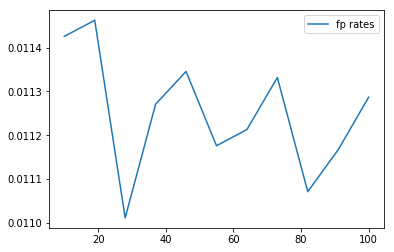

In [32]:
# место для графиков
plt.plot(L, fps, label='fp rates')
plt.legend()
plt.show()

In [33]:
# график зависимости FPR от p
fps = []
for p in P:
    length = 10  # зафиксируем значение length
    experiments = {}
    k = 1
    fp_rates = []
    while k <= 1000:  # на 10 экспериментах было ничего не понятно
        hash_table = {}
        strings = generate_str(int(length))
        for item in strings:
            if add_check_collision(item, p, hash_table) is True:
                experiments[k] = True
            else:
                experiments[k] = False
                    
        # test
        tp, fp, tn, fn = 0, 0, 0, 0
        for i in range(1000):
            test_string = ''.join(random.choices(string.ascii_lowercase, k=12))
            res = check(test_string, p, hash_table)  # доставать значения из хеш таблицы
            if res is True:
                if test_string in strings:
                    tp += 1
                else:
                    fp += 1
            else:
                if test_string in strings:
                    fn += 1
                else:
                    tn += 1
        fp_rate = fp / (fp + tn)
        fp_rates.append(fp_rate)
        k += 1
    fp = sum(fp_rates)/k
    fps.append(fp)

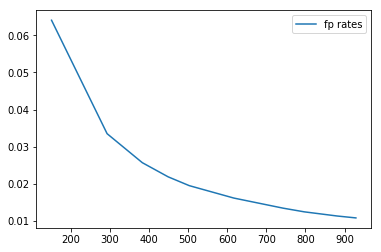

In [34]:
# место для графиков
plt.plot(P, fps, label='fp rates')
plt.legend()
plt.show()

По всей видимости FPR не зависит от длины строк, но зависит от значения большого просто числа, используемого в хэш-функции. Чем больше p, тем меньше FPR.